In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import IPython.display

In [20]:
fe, data = scipy.io.wavfile.read('myson.wav')

In [21]:
length = data.shape[0] / fe
time = np.linspace(0., length, data.shape[0])

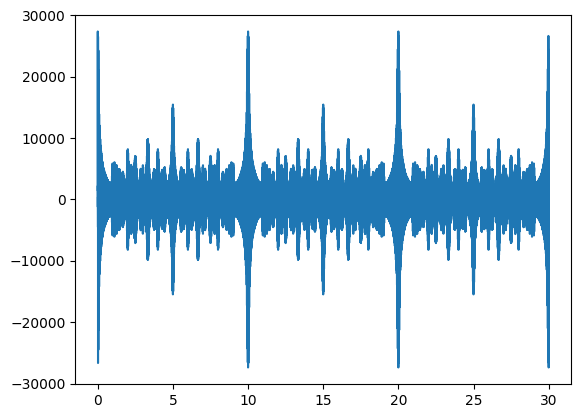

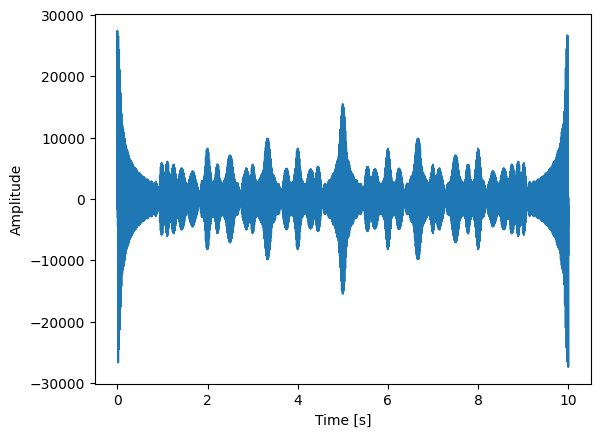

In [22]:
plt.plot(time, data, label="Flute signal")
plt.show()
plt.plot(time[0:441000], data[0:441000], label="Flute signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()
IPython.display.Audio(data, rate = fe)

In [23]:
T=0.04 # durée de stationnarité des signale sonores
N = round(T*fe)
t = np.array(range(-N+1,N-1))/fe;

decalage = 0.01
ND = round(decalage*fe);

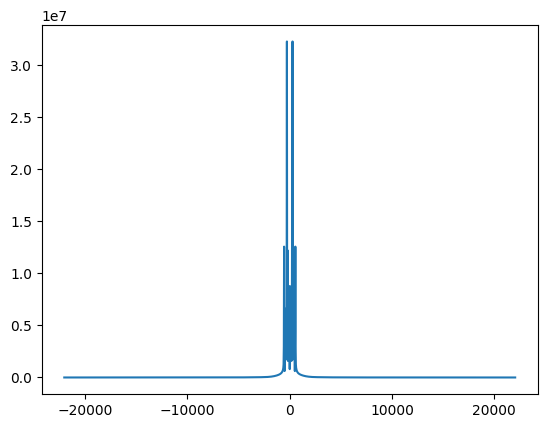

In [24]:
indice_tram = 210
x = data[1+int(indice_tram)*ND:N+int(indice_tram)*ND]
window = scipy.signal.windows.barthann(51,sym=True)
x = scipy.signal.convolve(x,window,mode='same')
X = scipy.fft.fft(x)
XP = scipy.fft.fftshift(np.abs(X))
#XP_mean = XP[XP>XP.mean()]
#peaks, _ = scipy.signal.find_peaks(XP_mean)
#freq = np.linspace(-fe/2,fe/2,len(XP))
freq = np.linspace(-fe/2,fe/2,len(XP))
plt.plot(freq, XP)
plt.show()